In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [7]:
df['label'].value_counts()/len(df)*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [8]:
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']

In [9]:
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [10]:
ham.shape

(4825, 4)

In [11]:
spam.shape

(747, 4)

In [12]:
ham1 = ham.sample(spam.shape[0])
ham1.shape

(747, 4)

In [14]:
# balance your data where target value is spam or ham
data = ham1.append(spam, ignore_index=True)
data.shape

(1494, 4)

In [15]:
data.head()

,label,message,length,punct
0,ham,"Hey, I missed you tm of last night as my phone...",111,9
1,ham,Y lei?,6,1
2,ham,Then why no one talking to me,29,0
3,ham,Convey my regards to him,24,0
4,ham,Fine i miss you very much.,26,1


In [16]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

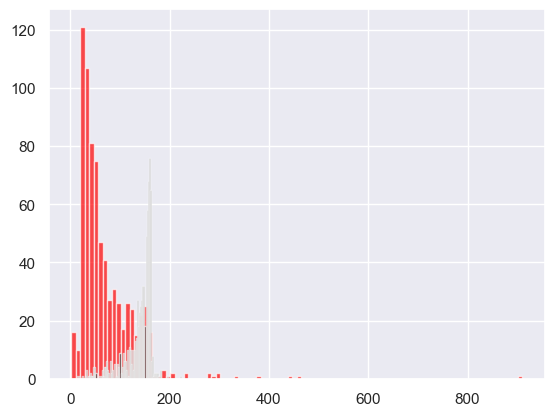

In [22]:
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7, color='red')
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7, color='black')
plt.show()

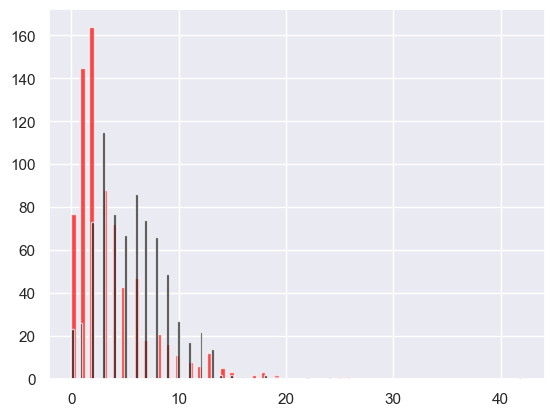

In [23]:
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7, color='red')
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7, color='black')
plt.show()

# split the data into training and test for building ML model

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'],
                                                   test_size=0.3, random_state=101)

In [26]:
x_train

1168    1st wk FREE! Gr8 tones str8 2 u each wk. Txt N...
930     You have 1 new voicemail. Please call 08719181...
1152    Xmas Offer! Latest Motorola, SonyEricsson & No...
34                             How was txting and driving
339                        Aight, we'll head out in a few
                              ...                        
1417    You can donate £2.50 to UNICEF's Asian Tsunami...
75                           Ok. I.ll do you right later.
599     In other news after hassling me to get him wee...
1361    URGENT! This is the 2nd attempt to contact U!U...
863     Orange customer, you may now claim your FREE C...
Name: message, Length: 1045, dtype: object

# Build NLP model to ensure your text variable get change into vector form

# Text Analytics by using SPAM Detection

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# pipeline package to merge NLP and Machine Learning together and get the output

from sklearn.pipeline import Pipeline

# RandomForest Classifier Algorithm

In [30]:
classifier = Pipeline([('TF-IDF', TfidfVectorizer()), 
                      ('Classifier', RandomForestClassifier())])

In [31]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier', RandomForestClassifier())])

In [32]:
# predict the model by using train and test data
y_pred_train = classifier.predict(x_train)

y_pred_test = classifier.predict(x_test)

In [33]:
y_pred_train

array(['spam', 'spam', 'spam', ..., 'ham', 'spam', 'spam'], dtype=object)

In [35]:
y_pred_test, y_test

(array(['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham',
        'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham',
        'spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham',
        'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
        'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham',
        'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam',
        'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam',
        'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
        'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam',
        'ham', 'spam', 'sp

In [36]:
# Evaluation matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
print(confusion_matrix(y_train, y_pred_train))
print("*******************"*10)
print(confusion_matrix(y_test, y_pred_test))

[[521   0]
 [  0 524]]
**********************************************************************************************************************************************************************************************
[[224   2]
 [ 25 198]]


In [39]:
print(classification_report(y_train, y_pred_train))
print("*******************"*10)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       521
        spam       1.00      1.00      1.00       524

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045

**********************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       226
        spam       0.99      0.89      0.94       223

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [40]:
print(accuracy_score(y_train, y_pred_train))
print("*******************"*10)
print(accuracy_score(y_test, y_pred_test))

1.0
**********************************************************************************************************************************************************************************************
0.9398663697104677


# SVM

In [45]:
classifier1 = Pipeline([('TF-IDF', TfidfVectorizer()), 
                      ('Classifier', SVC())])

In [46]:
classifier1.fit(x_train, y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()), ('Classifier', SVC())])

In [47]:
# predict the model by using train and test data
y_pred_train1 = classifier1.predict(x_train)

y_pred_test1 = classifier1.predict(x_test)

In [48]:
print(accuracy_score(y_train, y_pred_train1))
print("*******************"*10)
print(accuracy_score(y_test, y_pred_test1))

0.9980861244019139
**********************************************************************************************************************************************************************************************
0.9487750556792873


# XGBoost Classifierm

In [58]:
data.head(2)

,label,message,length,punct
0,ham,"Hey, I missed you tm of last night as my phone...",111,9
1,ham,Y lei?,6,1


In [59]:
data['label'] = np.where(data['label']=='ham',0,1)

In [60]:
data.head()

,label,message,length,punct
0,0,"Hey, I missed you tm of last night as my phone...",111,9
1,0,Y lei?,6,1
2,0,Then why no one talking to me,29,0
3,0,Convey my regards to him,24,0
4,0,Fine i miss you very much.,26,1


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    1494 non-null   int32 
 1   message  1494 non-null   object
 2   length   1494 non-null   int64 
 3   punct    1494 non-null   int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 41.0+ KB


In [62]:
data['label'].value_counts()

0    747
1    747
Name: label, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'],
                                                   test_size=0.3, random_state=101)

In [50]:
!pip install xgboost

In [52]:
from xgboost import XGBClassifier

In [64]:
classifier2 = Pipeline([('TF-IDF', TfidfVectorizer()), 
                      ('Classifier', XGBClassifier())])

In [65]:
classifier2.fit(x_train, y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_p

In [66]:
# predict the model by using train and test data
y_pred_train2 = classifier2.predict(x_train)

y_pred_test2 = classifier2.predict(x_test)

In [67]:
print(accuracy_score(y_train, y_pred_train2))
print("*******************"*10)
print(accuracy_score(y_test, y_pred_test2))

0.9961722488038277
**********************************************************************************************************************************************************************************************
0.9020044543429844


# RandomForest is the best model
# without balancing the data,we wanted to explore

In [68]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [69]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'],
                                                   test_size=0.3, random_state=101)

In [71]:
classifier_without_balance = Pipeline([('TF-IDF', TfidfVectorizer()), 
                      ('Classifier', RandomForestClassifier())])

In [72]:
classifier_without_balance.fit(x_train, y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier', RandomForestClassifier())])

In [73]:
# predict the model by using train and test data
y_pred_train3 = classifier_without_balance.predict(x_train)

y_pred_test3 = classifier_without_balance.predict(x_test)

In [74]:
print(accuracy_score(y_train, y_pred_train3))
print("*******************"*10)
print(accuracy_score(y_test, y_pred_test3))

1.0
**********************************************************************************************************************************************************************************************
0.9760765550239234


In [76]:
print(classification_report(y_train, y_pred_train3))
print("*******************"*10)
print(classification_report(y_test, y_pred_test3))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3350
        spam       1.00      1.00      1.00       550

    accuracy                           1.00      3900
   macro avg       1.00      1.00      1.00      3900
weighted avg       1.00      1.00      1.00      3900

**********************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1475
        spam       1.00      0.80      0.89       197

    accuracy                           0.98      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.98      0.98      0.97      1672

